## ACTIVIDAD 2: CLASIFICACIÓN DE TEXTO
### Marta Alejandra Llanos Rodríguez

En este documento mostraré los modelos y sus resultados con 100 features en la matriz TF-idf y sin quitar las stop words. 

Estructura del documento: 
1. Pre-procesamiento de datos 
2. Matriz TF-idf
3. División prueba y entrenamiento
4. Modelos de entrenamiento 

    a. Clasificador bayesiano ingenuo 

    b. Máquinas SMV 
    
    c. Modelo árbol de decisión
    
5. Resumen de los modelos

In [1]:
#Librerias
import numpy as np 
import pandas as pd
import string 
import re
import spacy


### 1. Pre-procesamiento de datos 

Lectura de datos

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df= df [['v1','v2']]
df.head(2)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


Eliminacion stop words

En este caso no vamos a eliminar las stopwords, sin embargo lo dejaré por practicidad

In [3]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize 
#import pandas as pd

#def remove_stopwords_from_column(dataframe, column_name):
#    stop_words = set(stopwords.words('english'))

    # Aplicar la función de tokenización y eliminación de stop words a cada fila de la columna
#    dataframe[column_name] = dataframe[column_name].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words]))

#    return dataframe

#df = remove_stopwords_from_column(df, 'v2')
#df.head(2)

### 2. Matriz TF-idf

In [4]:
docs = df['v2']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer(max_features = 100, lowercase= True)

# Transformar los textos en vectores TF-IDF
X_tfidf = vectorizer.fit_transform(docs)

# Mostrar el vocabulario TF-IDF generado
print("Vocabulario TF-IDF:", vectorizer.get_feature_names_out())

# Mostrarlo en dataframe
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out(), index=docs)

tfidf_df.head()

Vocabulario TF-IDF: ['about' 'all' 'am' 'and' 'any' 'are' 'as' 'at' 'back' 'be' 'but' 'by'
 'call' 'can' 'come' 'da' 'day' 'did' 'do' 'don' 'dont' 'for' 'free'
 'from' 'get' 'go' 'going' 'good' 'got' 'gt' 'have' 'he' 'her' 'hi' 'home'
 'how' 'if' 'in' 'is' 'it' 'its' 'just' 'know' 'later' 'like' 'll' 'lor'
 'love' 'lt' 'me' 'mobile' 'my' 'need' 'new' 'no' 'not' 'now' 'of' 'ok'
 'on' 'one' 'only' 'or' 'our' 'out' 'please' 'pls' 'reply' 'see' 'send'
 'she' 'so' 'sorry' 'still' 'stop' 'take' 'tell' 'text' 'that' 'the'
 'then' 'there' 'they' 'think' 'this' 'time' 'to' 'today' 'txt' 'up' 'ur'
 'want' 'was' 'we' 'what' 'when' 'will' 'with' 'you' 'your']


,about,all,am,and,any,are,as,at,back,be,...,ur,want,was,we,what,when,will,with,you,your
v2,,,,,,,,,,,,,,,,,,,,,
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ok lar... Joking wif u oni...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U dun say so early hor... U c already then say...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Nah I don't think he goes to usf, he lives around here though",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Palabras con más peso en porcentaje:


<Axes: >

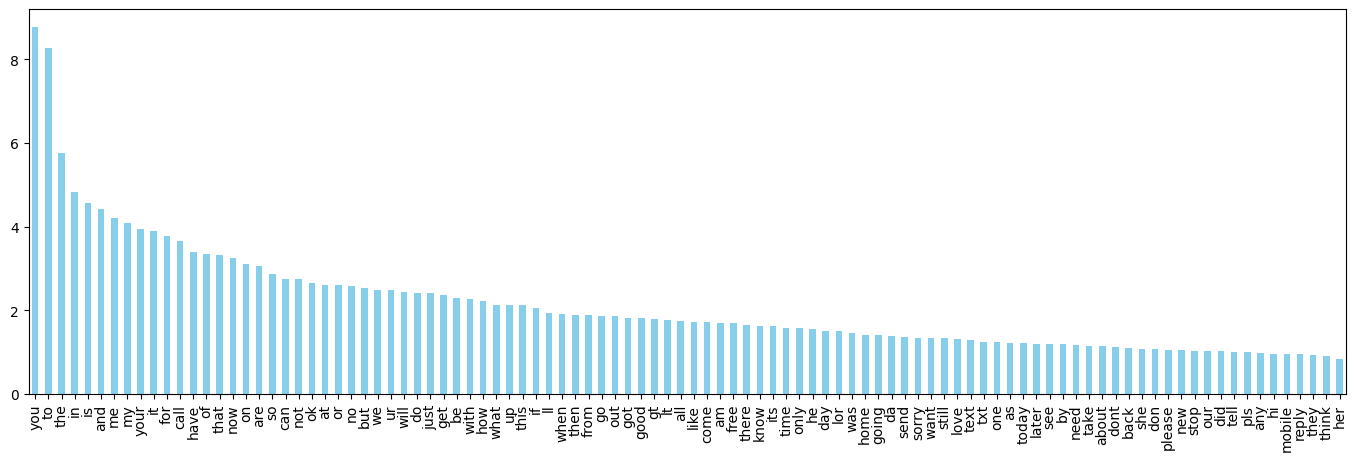

In [6]:
import matplotlib.pyplot as plt
tfidf_scores_percent = (tfidf_df.mean() * 100).round(2).sort_values(ascending=False)
print("Palabras con más peso en porcentaje:")
tfidf_scores_percent.plot(kind='bar', figsize=(17, 5), color='skyblue')

### 3. División prueba y entrenamiento

In [7]:
categs = df['v1']


In [8]:
from sklearn.model_selection import train_test_split
docs_train, docs_test, categs_train, categs_test = train_test_split(X_tfidf, categs, test_size = 0.25, 
                                                                    random_state = 50)

### 4. Modelos de entrenamiento

#### a. Clasificador bayesiano ingenuo

In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(docs_train, categs_train)

MultinomialNB()

In [10]:
# Predicción del set de test

categs_pred_clf = clf.predict(docs_test)

In [11]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_clf = confusion_matrix(categs_test, categs_pred_clf)
cm_clf

array([[1189,    4],
       [  88,  112]])

In [12]:
acc_train_clf = clf.score(docs_train, categs_train)
acc_test_clf = clf.score(docs_test, categs_test)
fiabilidad_clf = acc_test_clf / acc_train_clf

print("Accuracy entrenamiento: ", acc_train_clf)
print("Accuracy PRUEBA: ", acc_test_clf)
print("Fiabilidad: ", acc_test_clf / acc_train_clf)  

Accuracy entrenamiento:  0.9418521177315147
Accuracy PRUEBA:  0.9339554917444365
Fiabilidad:  0.9916158536585367


#### b. Máquinas SMV 

In [13]:
# Entrenamiento del clasificador NB

from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(docs_train, categs_train)

SVC(kernel='linear')

In [14]:
# Predicción del set de test

categs_pred_svm = svm.predict(docs_test)

In [15]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(categs_test, categs_pred_svm)
cm_svm

array([[1182,   11],
       [  42,  158]])

In [16]:
acc_train_svm = svm.score(docs_train, categs_train)
acc_test_svm = svm.score(docs_test, categs_test)
fiabilidad_svm = acc_test_svm / acc_train_svm

print("Accuracy entrenamiento: ", acc_train_svm)
print("Accuracy PRUEBA: ", acc_test_svm)
print("Fiabilidad: ", acc_test_svm / acc_train_svm)  

Accuracy entrenamiento:  0.9696099545345777
Accuracy PRUEBA:  0.9619526202440776
Fiabilidad:  0.9921026653504442


#### b. Modelo árbol de decisión

Árboles de decisión

In [17]:
# Entrenamiento del clasificador Árboles de Decisión

from sklearn import tree

a_dec = tree.DecisionTreeClassifier()
a_dec.fit(docs_train, categs_train)

DecisionTreeClassifier()

In [18]:
# Predicción del set de test

categs_preda_dec = a_dec.predict(docs_test)

In [19]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cma_dec = confusion_matrix(categs_test, categs_preda_dec)
cma_dec

array([[1162,   31],
       [  34,  166]])

In [20]:
acc_traina_dec = a_dec.score(docs_train, categs_train)
acc_testa_dec = a_dec.score(docs_test, categs_test)
fiabilidad_dec = acc_testa_dec / acc_traina_dec

print("Accuracy entrenamiento: ", acc_traina_dec)
print("Accuracy PRUEBA: ", acc_testa_dec)
print("Fiabilidad: ", acc_testa_dec / acc_traina_dec)  

Accuracy entrenamiento:  0.9966499162479062
Accuracy PRUEBA:  0.9533381191672649
Fiabilidad:  0.9565426170468186


Random Forest

In [21]:
# Entrenamiento del clasificador Árboles de Decisión

from sklearn.ensemble import RandomForestClassifier

r_f = RandomForestClassifier(n_estimators=10)
r_f.fit(docs_train, categs_train)

RandomForestClassifier(n_estimators=10)

In [22]:
# Predicción del set de test

categs_predr_f = r_f.predict(docs_test)

In [23]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cmr_f = confusion_matrix(categs_test, categs_predr_f)
cmr_f

array([[1189,    4],
       [  44,  156]])

In [24]:
acc_trainr_f = r_f.score(docs_train, categs_train)
acc_testr_f = r_f.score(docs_test, categs_test)
fiabilidadr_f = acc_testr_f / acc_trainr_f

print("Accuracy entrenamiento: ", acc_trainr_f)
print("Accuracy PRUEBA: ", acc_testr_f)
print("Fiabilidad: ", acc_testr_f / acc_trainr_f)  

Accuracy entrenamiento:  0.9947355826752812
Accuracy PRUEBA:  0.9655419956927495
Fiabilidad:  0.9706519124368534


### 5. Resumen de los modelos

In [25]:
data = {
    'Modelo': ['Naive Bayes', 'SVM', 'Árbol de Decisión', 'Random Forest'],
    'Acc entrenamiento': [round(acc_train_clf,3), round(acc_train_svm,3), round(acc_traina_dec,3), round(acc_trainr_f,3)],
    'Acc test': [round(acc_test_clf,3), round(acc_test_svm,3), round(acc_testa_dec,3), round(acc_testr_f,3)],
    'Fiabilidad': [round(fiabilidad_clf,3), round(fiabilidad_svm,3), round(fiabilidad_dec,3), round(fiabilidadr_f,3)]
}

# Crear un DataFrame con el diccionario
resumen_modelos = pd.DataFrame(data)
resumen_modelos

,Modelo,Acc entrenamiento,Acc test,Fiabilidad
0,Naive Bayes,0.942,0.934,0.992
1,SVM,0.970,0.962,0.992
2,Árbol de Decisión,0.997,0.953,0.957
3,Random Forest,0.995,0.966,0.971


In [26]:
resumen_modelos['Verdaderos Positivos'] = [cm_clf[0, 0], cm_svm[0, 0], cma_dec[0, 0], cmr_f[0, 0]]
resumen_modelos['Falsos Positivos'] = [cm_clf[0, 1], cm_svm[0, 1], cma_dec[0, 1], cmr_f[0, 1]]
resumen_modelos['Falsos Negativos'] = [cm_clf[1, 0], cm_svm[1, 0], cma_dec[1, 0], cmr_f[1, 0]]
resumen_modelos['Verdaderos Negativos'] = [cm_clf[1, 1], cm_svm[1, 1], cma_dec[1, 1], cmr_f[1, 1]]


In [28]:
Modelos_100f_sinstop = resumen_modelos
Modelos_100f_sinstop

,Modelo,Acc entrenamiento,Acc test,Fiabilidad,Verdaderos Positivos,Falsos Positivos,Falsos Negativos,Verdaderos Negativos
0,Naive Bayes,0.942,0.934,0.992,1189,4,88,112
1,SVM,0.970,0.962,0.992,1182,11,42,158
2,Árbol de Decisión,0.997,0.953,0.957,1162,31,34,166
3,Random Forest,0.995,0.966,0.971,1189,4,44,156


In [31]:
Modelos_100f_sinstop.to_csv('Modelos_100f_sinstop.csv', index=False)